# Описание проекта

Задачи: 
- проанализировать гипотезы по увеличению выручки интернет-магазина
- выделить рекомендации по результатам проведения А/В-теста для выбранных гипотез

## План исследования

- Приоритизировать гипотезы
- Предобработка данных 
- Визуализация кумулятивных метрик для анализа результатов теста
- Поиск аномальных значений
- Расчет статистической значимости на сырых данных
- Удаление аномальных значений
- Расчет статистической значимости для чистых данных
- Вывод и рекомендации

# Приоритизация гипотез

### Открываем данные и изучаем информацию

In [1]:
#Импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Загружаем таблицу с данными
try:
    data = pd.read_csv('hypothesis.csv')
except:
    data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#Смотрим информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
data.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
pd.options.display.max_colwidth = 130
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data_ice = data.sort_values(by='ICE', ascending=False)
data_ice['ICE'] = data_ice['ICE'].round(2)
data_ice[['hypothesis', 'ICE']]

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Согласно этому методу приоритизации самыми перспективными гипотезами являются (в порядке убывания приоритета):
1. Запустить акцию, дающую скидку на товар в день рождения	
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

In [6]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
data_rice = data.sort_values(by='RICE', ascending=False)
data_rice[['hypothesis', 'RICE']]

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Используя метод RICE, мы выявили, что наиболее важными гипотезами нужно считать:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. Запустить акцию, дающую скидку на товар в день рождения	

То есть те же, что и по методу ICE, но в ином порядке. Так получилось, потому что у первой в этом списке гипотезы  максимальный охват (Reach), а у последней в списке, наоборот, минимальный.

# Анализ результатов А/В теста

## Предобработка данных

In [7]:
try:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True )
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [11]:
#приведем столбцы с датами к типу датавремя
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [12]:
#посмотрим, есть ли пропущенные значения в таблицах
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [13]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропусков нет. Посмотрим, есть ли явные дубликаты.

In [14]:
orders.duplicated().sum()

0

In [15]:
visitors.duplicated().sum()

0

In [16]:
#посмотрим, сколько групп участвовало в тесте и сколько пользователей попало в каждую группу
o1 = orders.groupby('group').agg({'visitor_id':'count'})
o1

,visitor_id
group,
A,557
B,640


In [17]:
#проверяем, есть ли пользователи, попавшие в обе группы эксперимента
group_a = orders.query('group=="A"')['visitor_id']
group_b = orders.query('group=="B"')['visitor_id']
duplicates = orders.query('visitor_id in @group_a and visitor_id in @group_b')
duplicates['visitor_id'].nunique()

58

In [18]:
duplicates

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


In [19]:
#посмотрим, какова доля повторяющихся пользователей в общей численности 
duplicates['visitor_id'].nunique()/orders['visitor_id'].nunique()

0.05625606207565471

Доля таких пользователей составляет более 5%. Это существенный процент, нам стоит убрать из исследования таких пользователей. 

In [20]:
orders = orders.query('visitor_id not in @duplicates').reset_index(drop=True)

In [21]:
#Изучим временной интервал, узнав даты начала и окончания теста
test_start = orders['date'].min()
test_start

Timestamp('2019-08-01 00:00:00')

In [22]:
test_end = orders['date'].max()
test_end

Timestamp('2019-08-31 00:00:00')

Тест проводился в течение месяца - с 1 по 31 августа 2019 года.

In [23]:
B_visitors = visitors.query('group=="B"')
A_visitors = visitors.query('group=="A"')

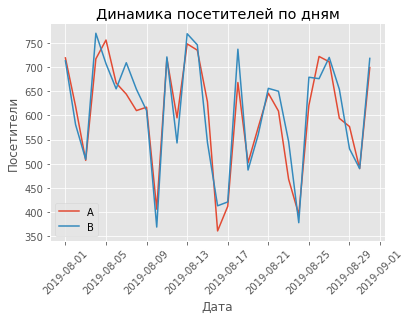

In [24]:
#Посмотрим динамику посетителей по дням в группах
plt.style.use('ggplot')
fig, ax = plt.subplots()
# Строим график группы А
plt.plot(A_visitors['date'], A_visitors['visitors'], label='A')

# Строим график группы B
plt.plot(B_visitors['date'], B_visitors['visitors'], label='B')

ax.set(title='Динамика посетителей по дням', xlabel='Дата', ylabel='Посетители')
plt.legend() 
plt.xticks(rotation = 45);

Динамика посещений интернет-магазина явно сильно колеблется. Минимальное количество посещений наблюдается ближе к концу недели - в пятницу-субботу. Возможно, в выходные дни клиенты этого магазина не очень-то задумываются о покупке того, что предлагает магазин.

### Строим график кумулятивной выручки по группам

In [25]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [27]:
#проверим, корректно ли был содан датафрейм cumulativeData путем сравнения максимальной и минимальной даты с исходными датами
test_start_check = cumulativeData['date'].min()
test_start_check

Timestamp('2019-08-01 00:00:00')

In [28]:
test_end_check = cumulativeData['date'].max()
test_end_check

Timestamp('2019-08-31 00:00:00')

Даты совпали. Есть основания считать, что датафрейм создан без ошибок.

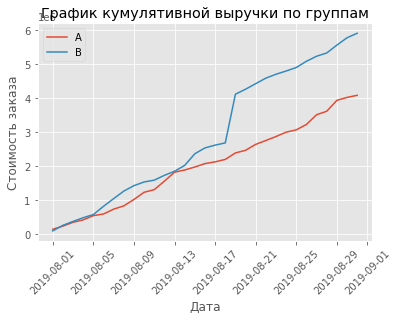

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
fig, ax = plt.subplots()
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
ax.set(title='График кумулятивной выручки по группам', xlabel='Дата', ylabel='Стоимость заказа')
plt.xticks(rotation = 45);

Выручка растет равномерно на протяжении теста. При этом выручка экспериментальной группы стабильно больше и к концу теста заметен скачок в росте. Вероятно, тут могут быть выбросы. Нужно будет проверить это.

### Построим графики среднего чека по группам

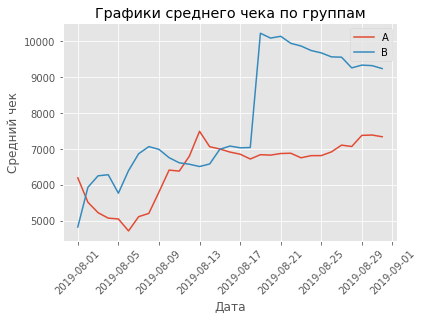

In [30]:
fig, ax = plt.subplots()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
ax.set(title='Графики среднего чека по группам', xlabel='Дата', ylabel='Средний чек')
plt.xticks(rotation = 45);

Средний чек по группам стабилизируется к концу теста в обеих группах. По графику можно сделать вывод, что средний чек группы В выше примерно на 3000.

### Построим график относительного различия для среднего чека

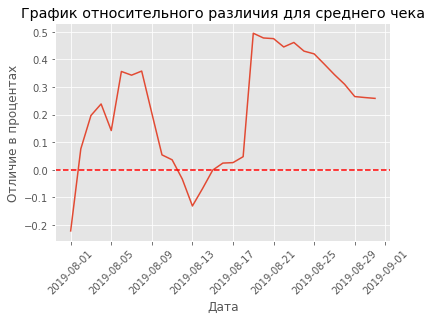

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig, ax = plt.subplots()
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--') 
ax.set(title='График относительного различия для среднего чека', xlabel='Дата', ylabel='Отличие в процентах')
plt.xticks(rotation = 45);

В нескольких точках график различия между сегментами резко «скачет», но к концу эксперимента несколько выравнивается и составляет разницу 30%.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

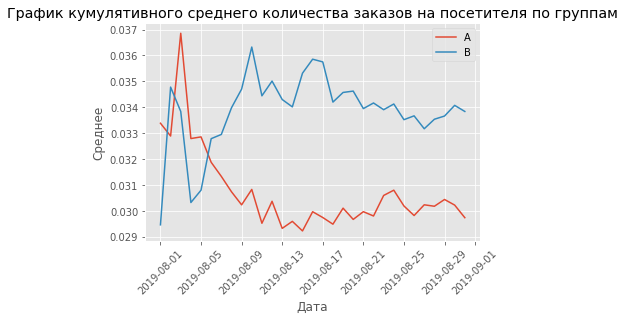

In [32]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее')
plt.xticks(rotation = 45);

На начало эксперимента среднее количество заказов в обеих группах сильно колебалось, но к 9 августа график показывает некоторую разницу: показатель начал резко расти у группы В, после чего стабилизировался и к концу теста находится уже у отметки 0,034, тогда как в группе А показатель отстает на 4 пункта.

### Построим график относительного различия кумулятивных среднего количества заказов на посетителя

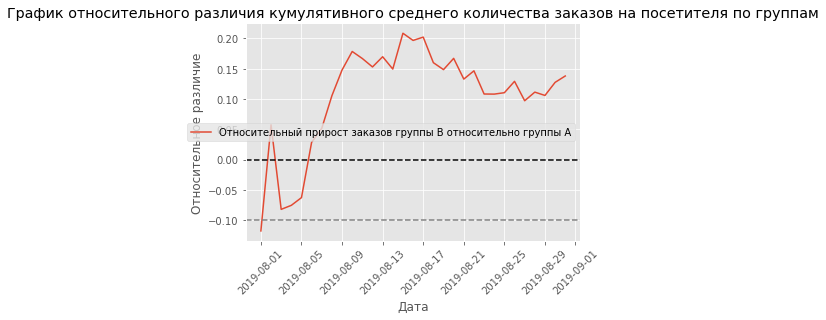

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост заказов группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного различия кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.xticks(rotation = 45);

В самом начале теста мы видим, что группа В отставала по количеству заказов, затем, 5 августа, количество заказов начало расти и уже к концу теста стабилизируется около 10-15 %.

### Построим точечный график стоимостей заказов

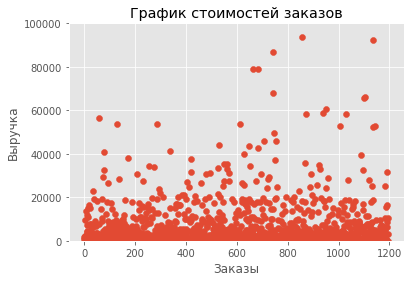

In [34]:
#построим точечный график 
x_values = pd.Series(range(0,len(orders['revenue'])))
fig, ax = plt.subplots()
plt.scatter(x_values, orders['revenue']) 
ax.set_ylim([0, 100000])
plt.xlabel('Заказы')
plt.ylabel('Выручка')
plt.title('График стоимостей заказов');

Все-таки большинство заказов не выходят за пределы 40 000 рублей. Есть редкие заказы за 60 000, 80 000 и выше. Их можно считать аномалиями.
Определим 95 и 99 перцентили среднего чека в выборке.

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей. За верхнюю границу примем заказы стоимостью 28000 рублей.

#### Посчитаем количество заказов на пользователя

In [36]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


#### Построим точечный график распределения заказов по пользователям

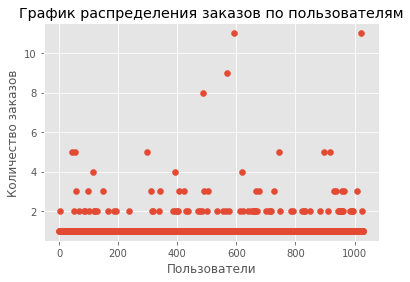

In [37]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('График распределения заказов по пользователям');

Самая частая история, когда клиент делает один заказ, чуть реже - 2, еще реже - 3. По 4 и 5 заказов делает совсем мало клиентов. Но пока непонятно, какова их доля. Нужно посчитать перцентили. 

In [38]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более четырех раз. За верхнюю границу стоит выбрать 2 заказа на пользователя. 

## Расчет статистической значимости

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

In [39]:
import scipy.stats as stats

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

visitorsPerDateA = visitors.query('group == "A"')

visitorsPerDateB = visitors.query('group == "B"')

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateB['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [41]:
p_value1 = "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])
growthB = "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

In [42]:
p_value1

'0.017'

In [43]:
growthB

'0.138'

P-value = 0.017 получилось меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный проигрыш группы B равен 13.8%.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [44]:
p_value2 = '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
ave_check = '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

In [45]:
p_value2

'0.729'

In [46]:
ave_check

'0.259'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B на ~26% выше среднего чека группы A. Поскольку относительное различие среднего чека между сегментами составляет ~26%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

### Отсеиваем аномальные заказы и чеки

Найденные ранее 95-й и 99-й перцентили средних чеков равны 28 000, 58 233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказам на пользователя.
Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы убираем 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [47]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [48]:
abnormalUsers.shape[0]

74

In [49]:
#подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateB['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [50]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


Результаты по среднему количеству заказов практически не изменились. P-value ниже уровня статистической значимости, поэтому как и в случае анализа исходных данных без учета аномальных значений, нулевую гипотезу придется отвергнуть. То есть разница в группах по количеству заказов есть и она значима. Посмотрим на результаты по среднему чеку.

In [51]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


P-value почти не изменился, но существенно снизилась разница между группами в среднем чеке. Поскольку p-value намного выше уровня статической значимости, то оснований отвергать нулевую гипотезу по-прежнему нет. 

## Вывод

Имеющиеся факты:

- Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
- Однако нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B намного лучше группы A
- График различия среднего чека говорит о том, что результаты группы B превосходят группу А на 30% на момент завершения эксперимента, однако все же имеет тенденцию к снижению.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В. Во-первых, следует признать очевидное превосходство группы В по количеству заказов, а также принять во внимание показатель по среднему чеку, значительно превышающий размер среднего чека в группе А. 